In [2]:
# Loading neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/stud.csv')


In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Displaying the shape of the data
data.shape

(1000, 8)

In [6]:
# Displaying the total missing values of the data
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
# Displaying the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# Exploring the data

print("Categorical in 'gender' variable:          ",end=" ")
print(data['gender'].unique())

print("Categorical in 'race_ethnicity' variable:      ",end=" ")
print(data['race_ethnicity'].unique())

print("Categorical in 'parental level of education' variable:         ",end=" ")
print(data['parental_level_of_education'].unique())

print("Categorical in 'lunch' varaible:    ",end="  ")
print(data['lunch'].unique())

print("Categorical in 'test preparation course' variable:   ",end=" ")
print(data['test_preparation_course'].unique())

Categorical in 'gender' variable:           ['female' 'male']
Categorical in 'race_ethnicity' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental level of education' variable:          ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in 'lunch' varaible:      ['standard' 'free/reduced']
Categorical in 'test preparation course' variable:    ['none' 'completed']


In [12]:
# define numerical and categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score']
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218
1,female,group C,some college,standard,completed,69,90,88,247,247
2,female,group B,master's degree,standard,none,90,95,93,278,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148
4,male,group C,some college,standard,none,76,78,75,229,229


In [14]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [15]:
reading_less_20 = data[data['reading_score'] < 20]['average'].count()
writing_less_20 = data[data['writing_score'] < 20]['average'].count()
math_less_20 = data[data['math_score'] < 20]['average'].count()

print(f"Number of students with less than 20 marks in reading: {reading_less_20}") 
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in math: {math_less_20}")

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


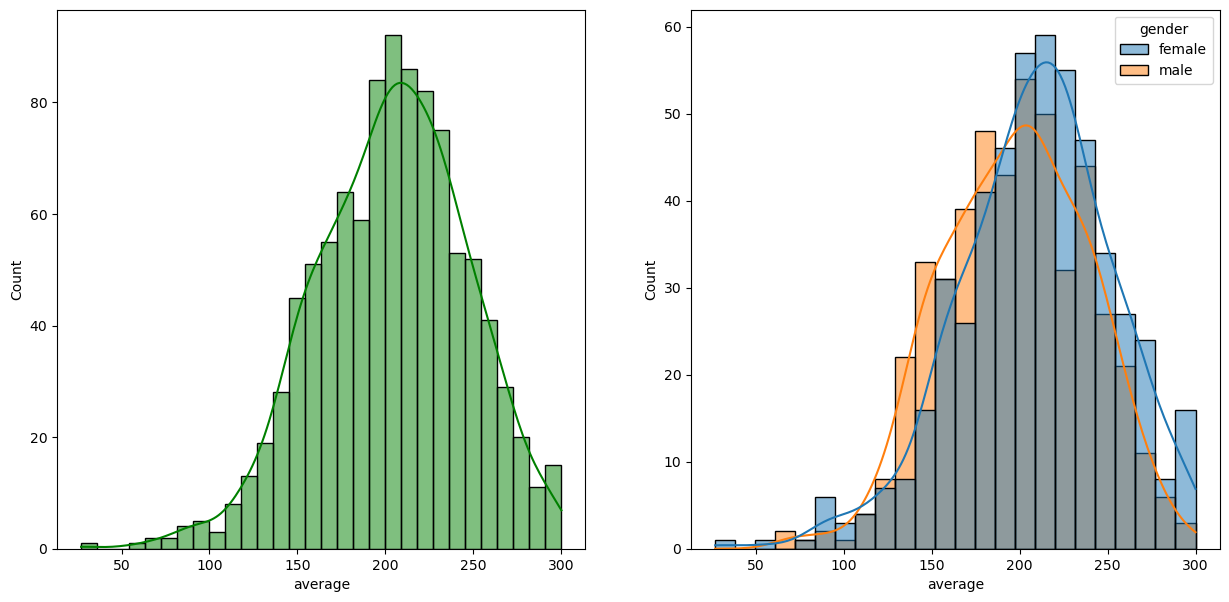

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

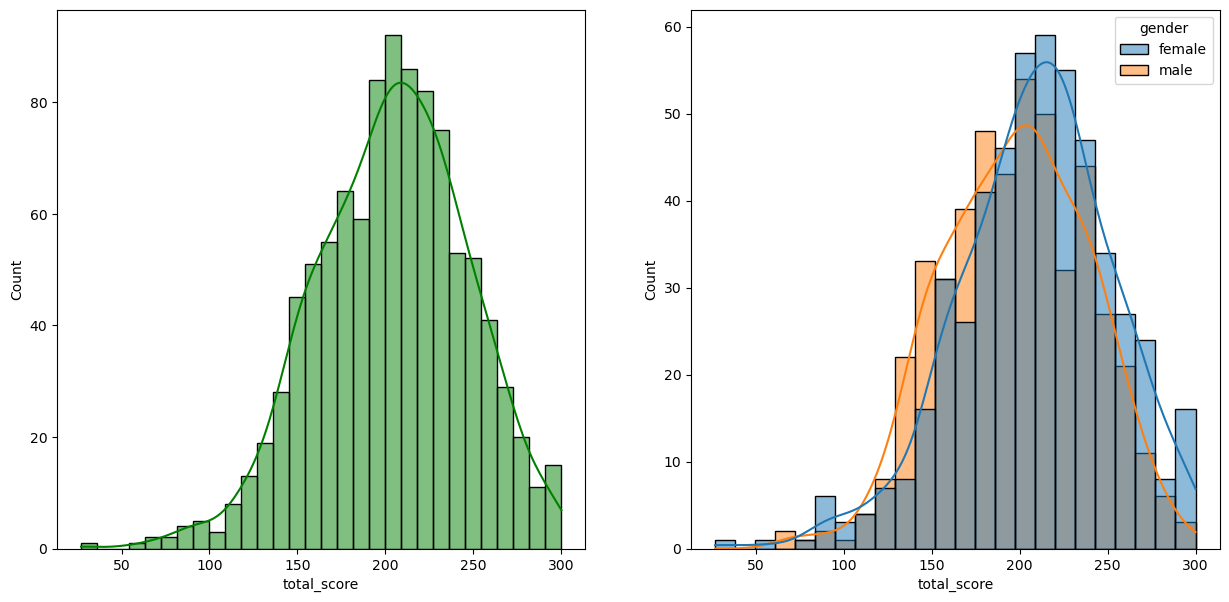

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')
plt.show()

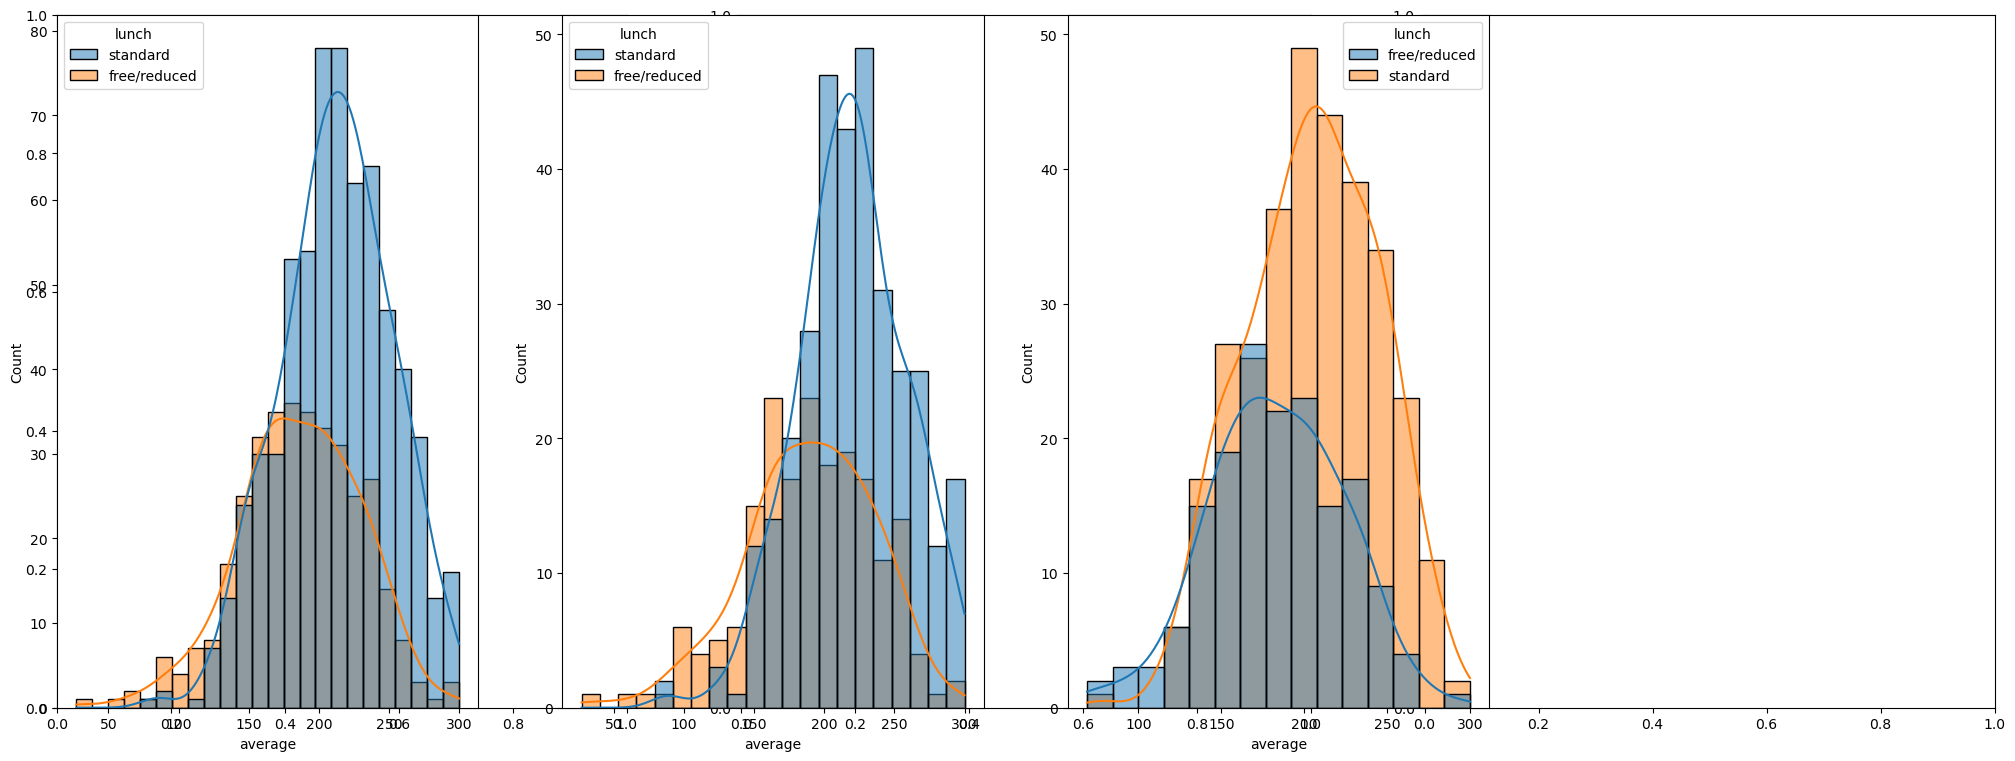

In [18]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

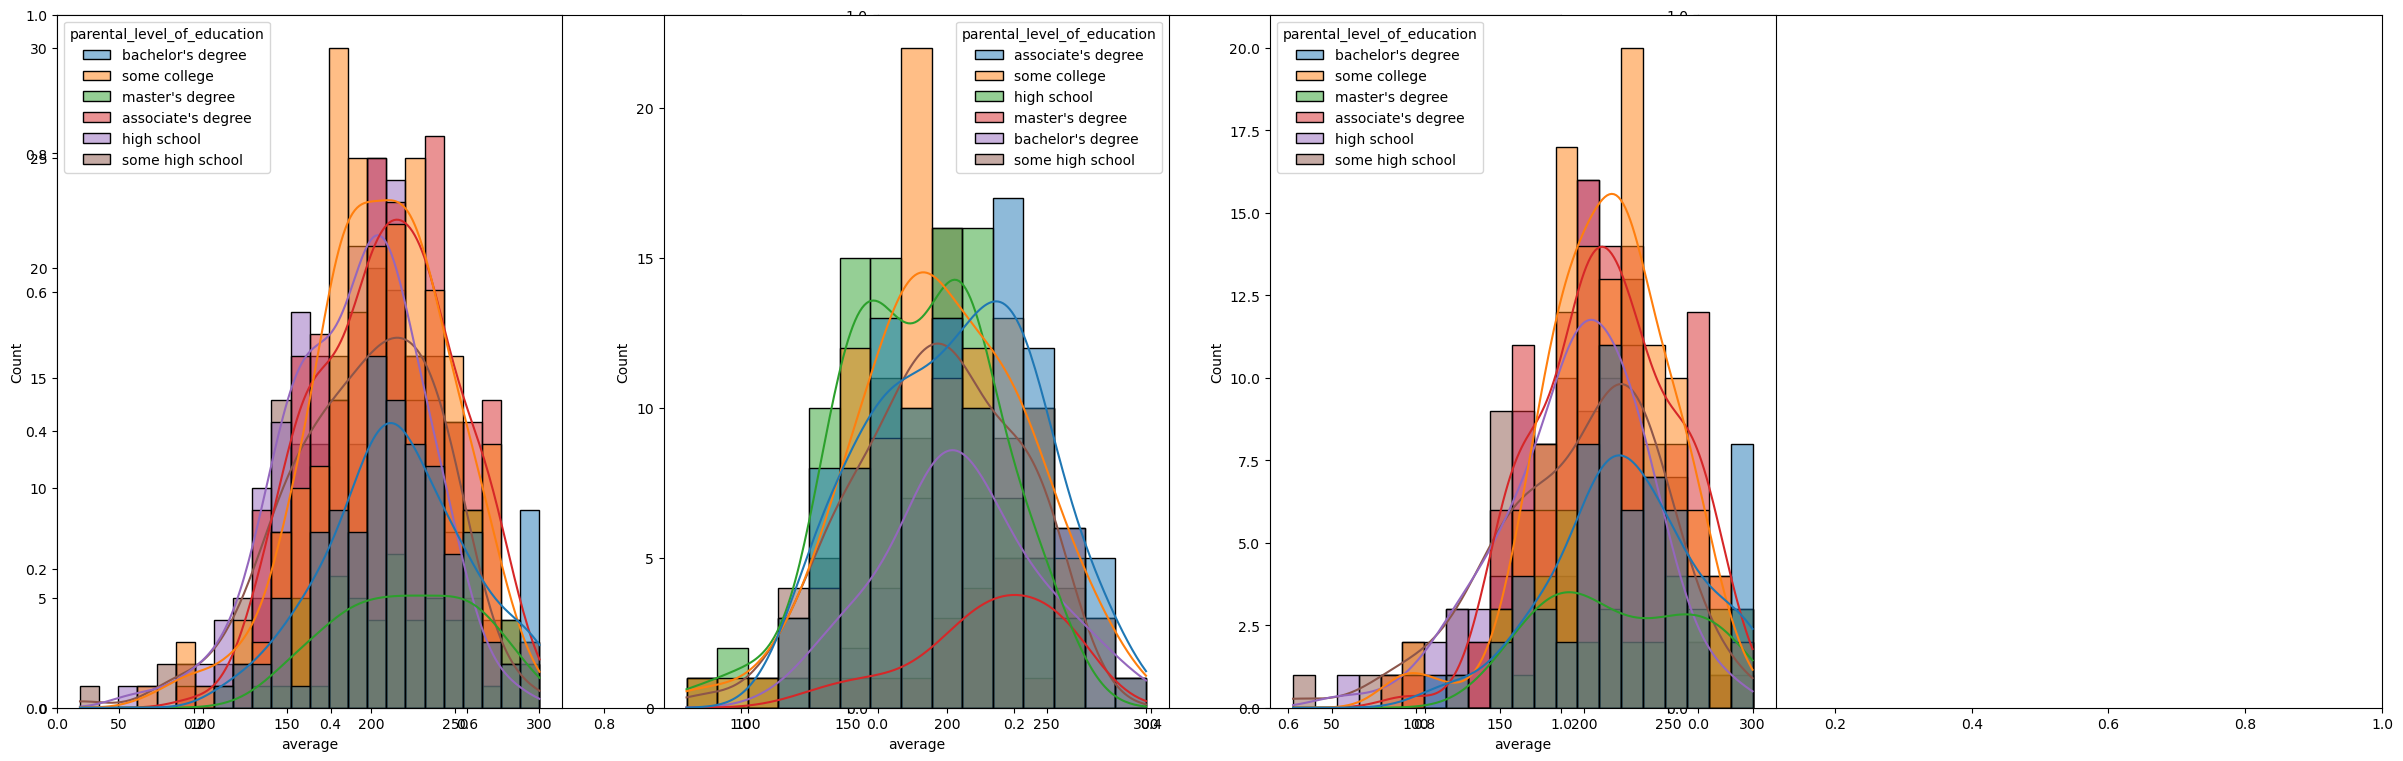

In [19]:
plt.subplots(1,3, figsize=(30,9))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue ='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

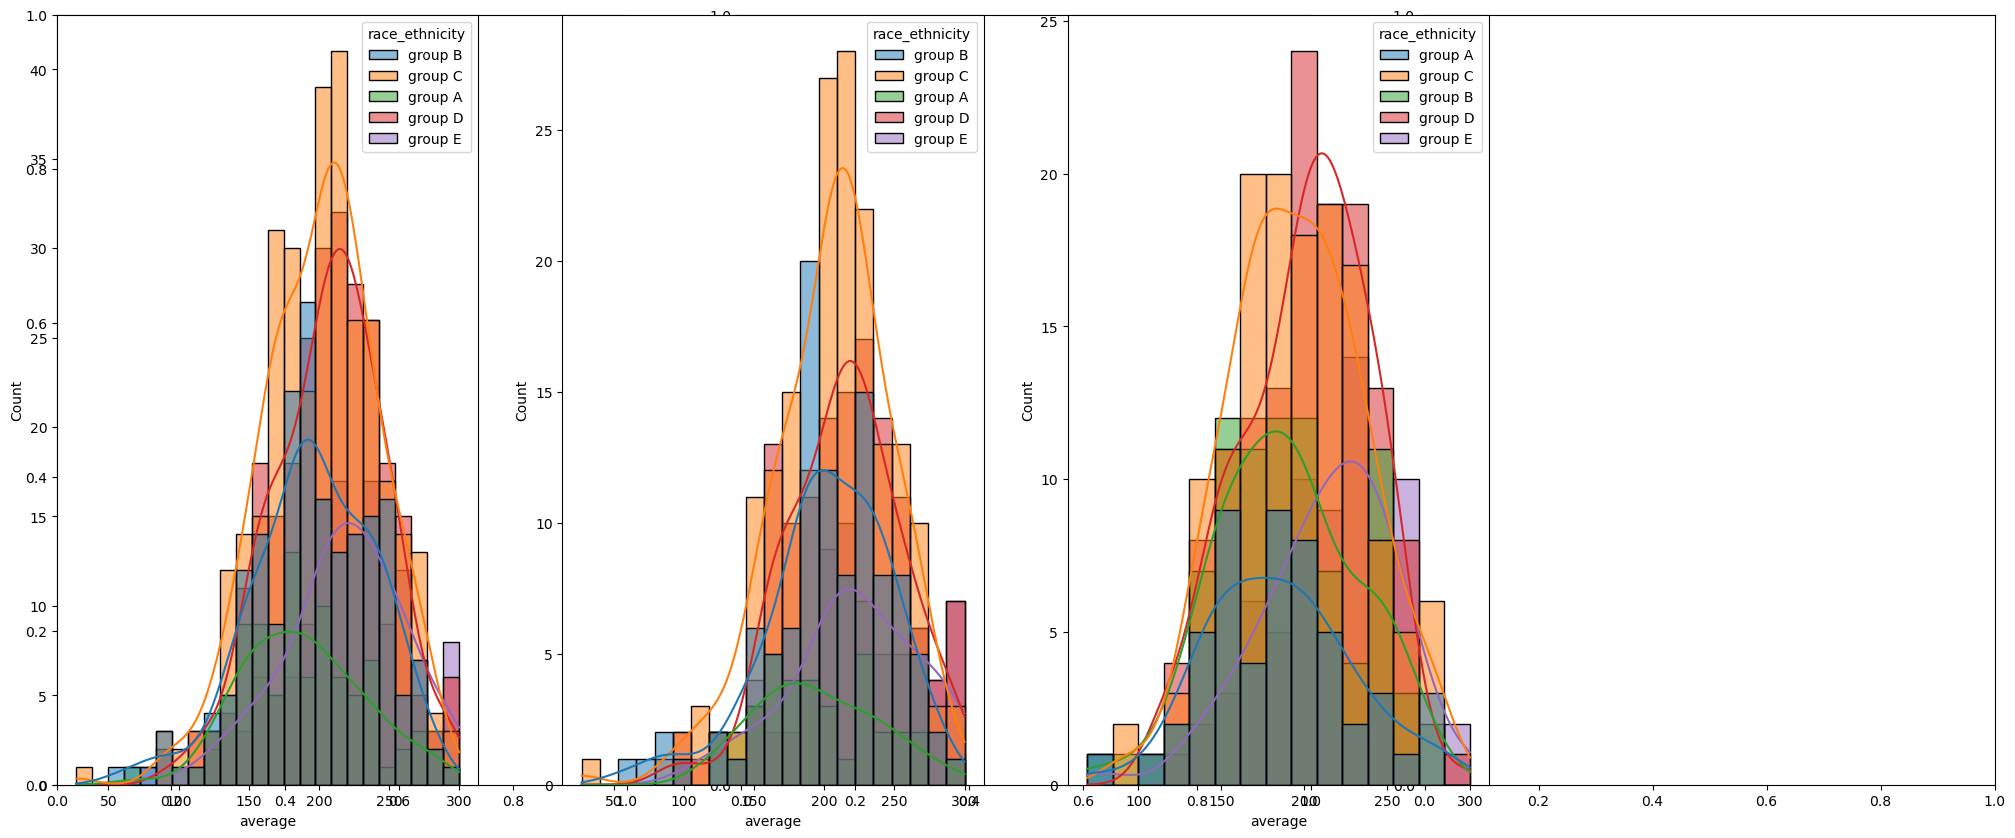

In [20]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

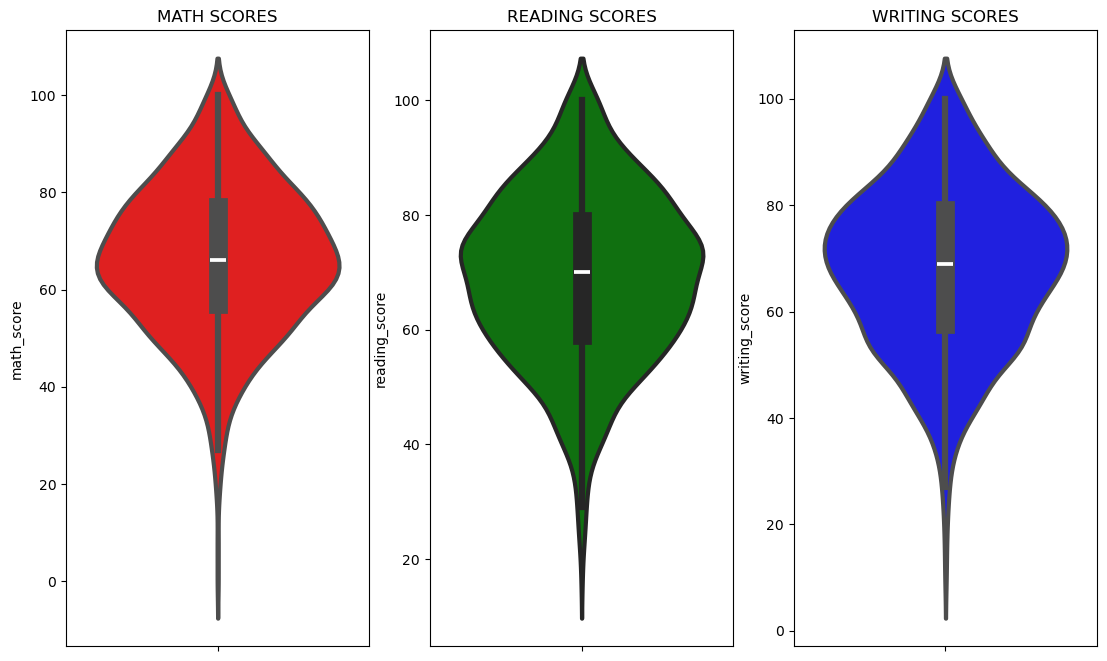

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=data,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=data,color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=data, color='b',linewidth=3)
plt.show()

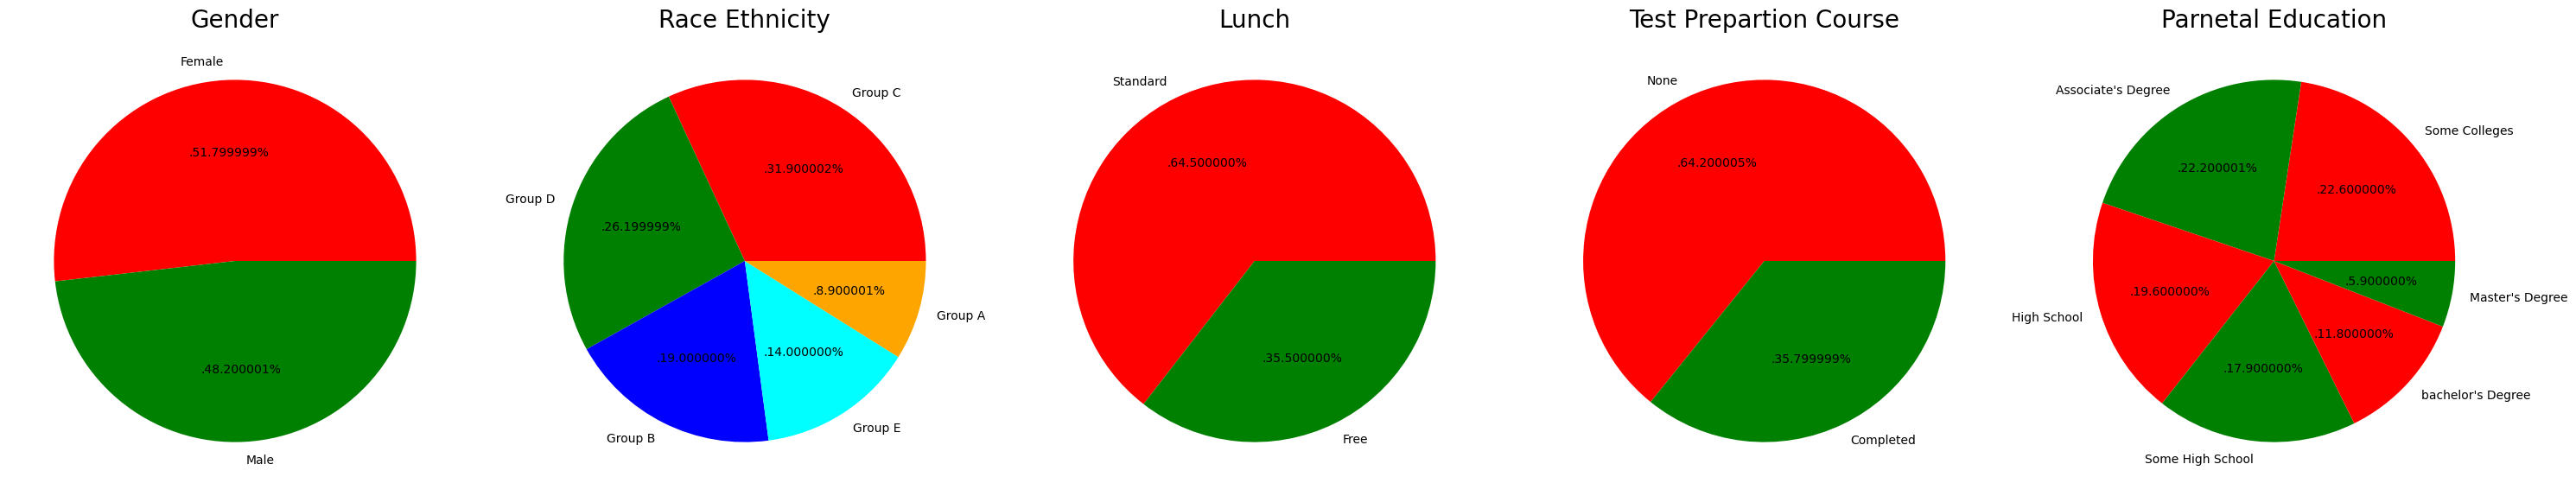

In [22]:
plt.rcParams['figure.figsize'] = (30,40)

plt.subplot(1,5,1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels='Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green','blue', 'cyan', 'orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Prepartion Course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some Colleges', "Associate's Degree", 'High School', 'Some High School', "bachelor's Degree", "Master's Degree"
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parnetal Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

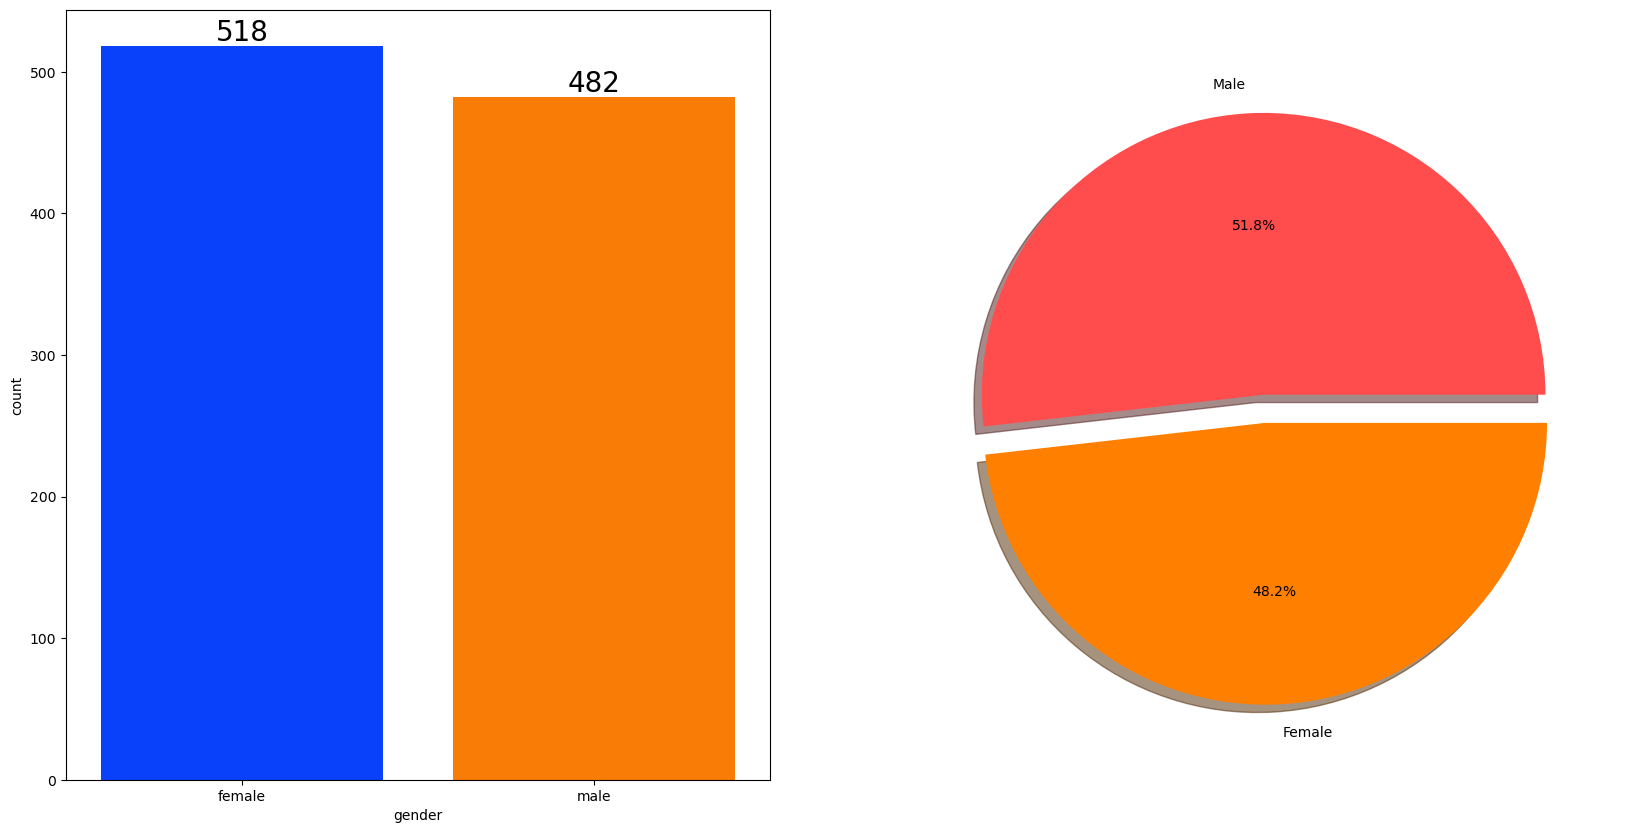

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data['gender'].value_counts(),labels=['Male', 'Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])

plt.show()

Group means:


,gender,math_score,reading_score,writing_score,average
0,female,63.633205,72.608108,72.467181,208.708494
1,male,68.728216,65.473029,63.311203,197.512448



Group counts:


,gender,count
0,female,518
1,male,482



Aggregated summary (mean, std):


math_score        reading_score        writing_score        average  \
             mean    std          mean    std          mean    std    mean   
gender                                                                       
female      63.63  15.49         72.61  14.38         72.47  14.84  208.71   
male        68.73  14.36         65.47  13.93         63.31  14.11  197.51   

               
          std  
gender         
female  43.63  
male    41.10

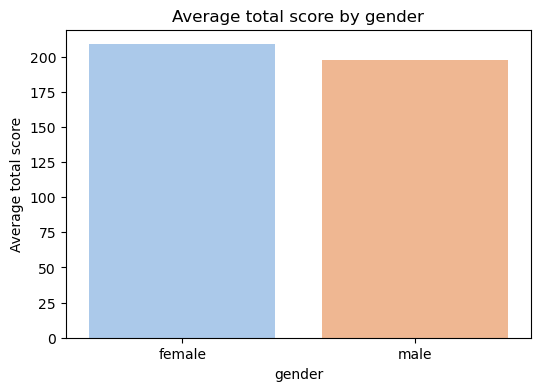

In [25]:
# Group by gender: mean scores and counts
gender_group_mean = data.groupby('gender')[['math_score','reading_score','writing_score','average']].mean().reset_index()
gender_group_count = data.groupby('gender').size().reset_index(name='count')

print('Group means:')
display(gender_group_mean)
print('\nGroup counts:')
display(gender_group_count)

# Combined aggregation: mean and std
gender_agg = data.groupby('gender').agg({
    'math_score':['mean','std'],
    'reading_score':['mean','std'],
    'writing_score':['mean','std'],
    'average':['mean','std']
}).round(2)
print('\nAggregated summary (mean, std):')
display(gender_agg)

# Simple bar plot comparing average by gender
plt.figure(figsize=(6,4))
sns.barplot(data=gender_group_mean, x='gender', y='average', palette='pastel')
plt.title('Average total score by gender')
plt.ylabel('Average total score')
plt.show()

In [ ]:
plt.figure(fi)